<a href="https://colab.research.google.com/github/Haadhi-Mohammed/Projects/blob/main/RealEstate_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary packages and modules

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# Importing Dataset

df = pd.read_excel('/content/real_estate_valuation.xlsx')
df = df.iloc[:, 1:]

In [3]:
df.shape

(414, 7)

In [4]:
# Seperating target and features

X = df.iloc[:,:6]
y = df.iloc[:,-1]

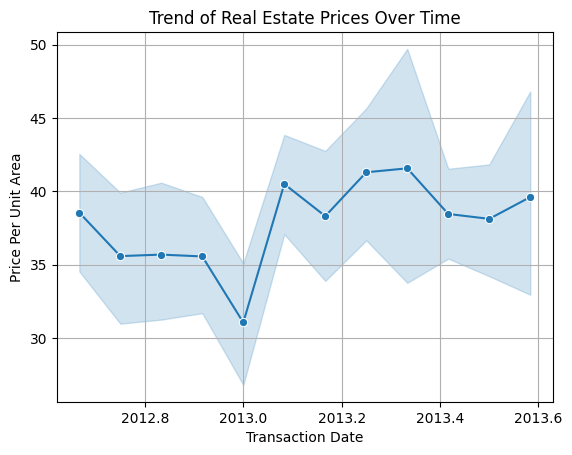

In [5]:
plt.figure()
sns.lineplot(data=df, x='X1 transaction date', y='Y house price of unit area', marker='o')
plt.title('Trend of Real Estate Prices Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Price Per Unit Area')
plt.grid(True)
plt.show()

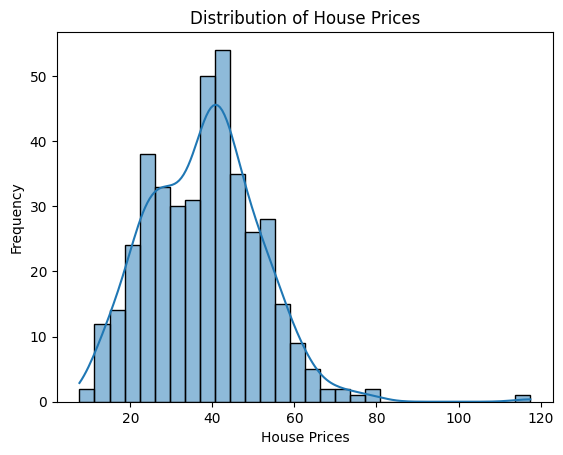

In [6]:
# Distribution of House Price

sns.histplot(df['Y house price of unit area'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.show()

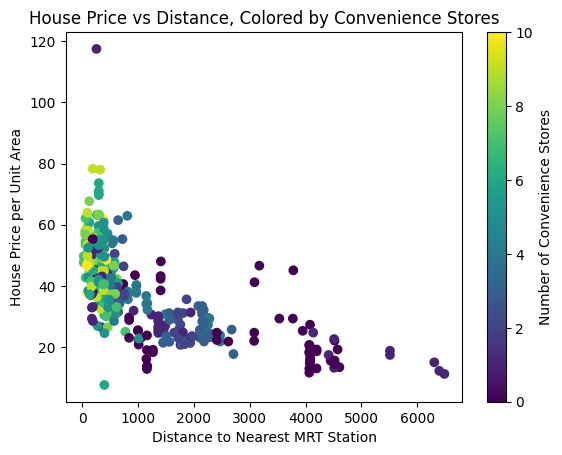

In [7]:
# House Price vs Age, Colored by Convenience Stores

plt.figure()
plt.scatter(df['X3 distance to the nearest MRT station'], df['Y house price of unit area'], c=df['X4 number of convenience stores'], cmap='viridis')
plt.xlabel('Distance to Nearest MRT Station')
plt.ylabel('House Price per Unit Area')
plt.title('House Price vs Distance, Colored by Convenience Stores')
plt.colorbar(label='Number of Convenience Stores')
plt.show()

In [8]:
# Splitting the dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
# Assigning variable names to each model

svr = SVR(kernel='linear')
rfr = RandomForestRegressor(n_estimators=100, criterion='absolute_error',random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, criterion='friedman_mse', random_state=42)

models = [svr, rfr, gbr]

In [ ]:
# Model Training and Evaluation

r2_score_lst = []
mae_lst = []
mse_lst = []

for model in models:
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  r2 = r2_score(y_test,y_pred)
  r2_score_lst.append(r2)

  mae = mean_absolute_error(y_test,y_pred)
  mae_lst.append(mae)

  mse = mean_squared_error(y_test,y_pred)
  mse_lst.append(mse)

result_df = pd.DataFrame({'Model':models, 'r2_Score':r2_score_lst, 'MAE':mae_lst, 'MSE': mse_lst})
result_df['Model'] = [str(model).split("(")[0] for model in result_df['Model']]

print(result_df)

# Correlation

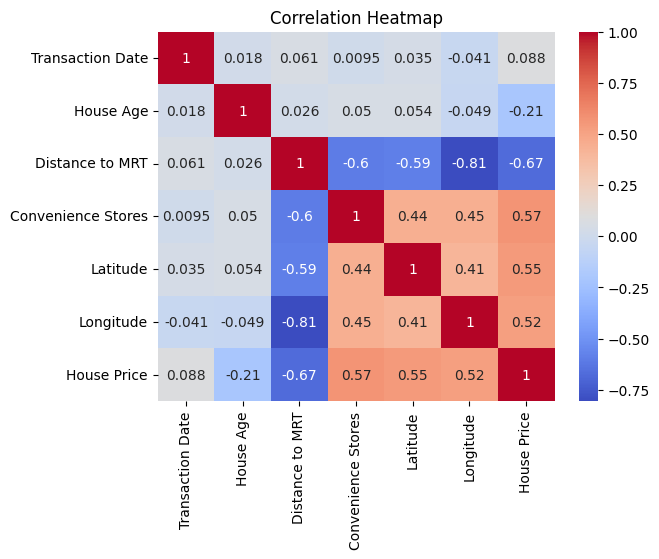

In [10]:
# Define new names for the columns
new_names = {
    'X1 transaction date': 'Transaction Date',
    'X2 house age': 'House Age',
    'X3 distance to the nearest MRT station': 'Distance to MRT',
    'X4 number of convenience stores': 'Convenience Stores',
    'X5 latitude': 'Latitude',
    'X6 longitude': 'Longitude',
    'Y house price of unit area': 'House Price'
}

# Calculate correlation matrix
correlation_matrix = df.corr()

# Rename the correlation matrix columns and index
correlation_matrix = correlation_matrix.rename(columns=new_names, index=new_names)

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [11]:
df_fe = df.copy()

## Interaction Terms

In [12]:
# creating interaction term

df_fe['convenience_latitude_interaction'] = df_fe['X4 number of convenience stores'] * df_fe['X5 latitude']
df_fe['convenience_longitude_interaction'] = df_fe['X4 number of convenience stores'] * df_fe['X6 longitude']
df_fe['latitude_longitude_interaction'] = df_fe['X5 latitude'] * df_fe['X6 longitude']

## Polynomial Transformation

In [13]:
# Select feature for polynomial transformation
selected_feature = df_fe[['X3 distance to the nearest MRT station']]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(selected_feature)

# Create a DataFrame with the new polynomial features
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['X3 distance to the nearest MRT station']))

# Merge the new polynomial features with the original data
df_fe = pd.concat([df_fe, poly_features_df], axis=1)

## Train Test Split

In [14]:
# Splitting Features and Target
X_fe = df_fe.drop('Y house price of unit area', axis=1)
y_fe = df_fe['Y house price of unit area']

# Split the data
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.2, random_state=42)

## Feature Scaling

In [15]:
# Standard Scaler
scaler = StandardScaler()
X_train_fe_scaled = scaler.fit_transform(X_train_fe)
X_test_fe_scaled = scaler.transform(X_test_fe)

## Model Prediction and Evaluation

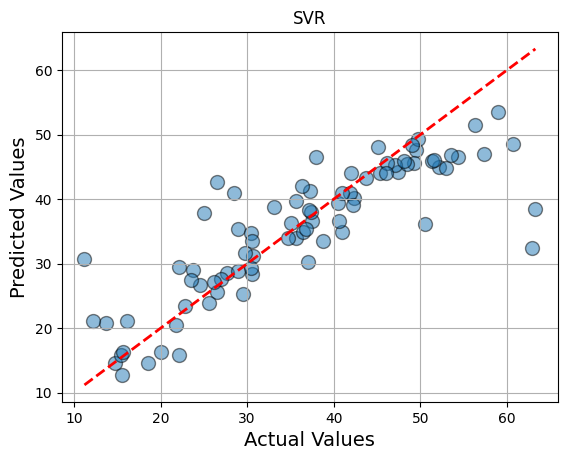

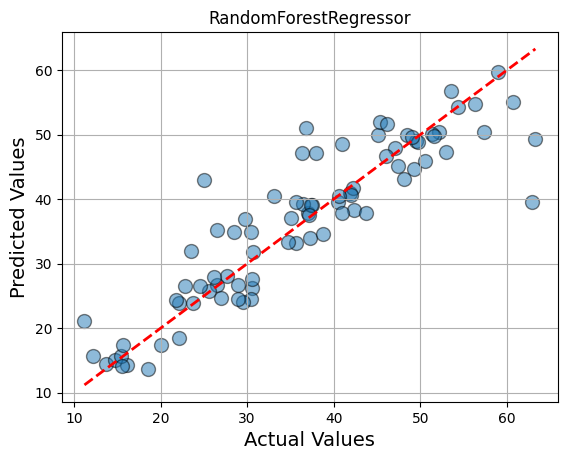

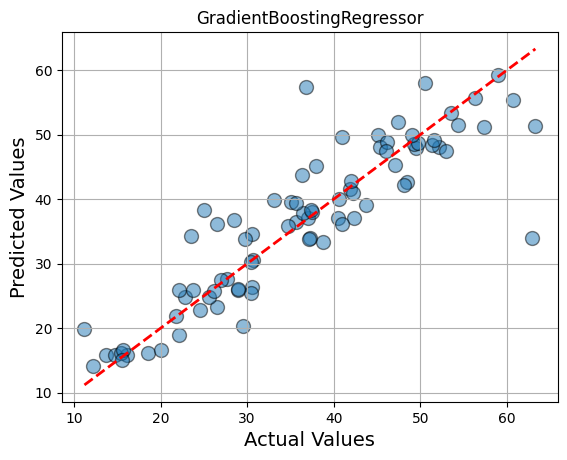



                       Model  r2_Score       MAE        MSE
0                        SVR  0.703083  4.639827  49.810780
1      RandomForestRegressor  0.813656  3.850247  31.260961
2  GradientBoostingRegressor  0.789537  3.915802  35.307195


In [16]:
r2_score_lst_fe = []
mae_lst_fe = []
mse_lst_fe = []

for model in models:
  model.fit(X_train_fe_scaled,y_train_fe)
  y_pred_fe = model.predict(X_test_fe_scaled)

  r2 = r2_score(y_test_fe,y_pred_fe)
  r2_score_lst_fe.append(r2)

  mae = mean_absolute_error(y_test_fe,y_pred_fe)
  mae_lst_fe.append(mae)

  mse = mean_squared_error(y_test_fe,y_pred_fe)
  mse_lst_fe.append(mse)

  plt.figure()
  plt.scatter(y_test_fe, y_pred_fe, alpha=0.5, edgecolors='k', s=100)
  plt.plot([min(y_test_fe), max(y_test_fe)], [min(y_test_fe), max(y_test_fe)], color='red', linestyle='--', linewidth=2)

  plt.title(model.__class__.__name__)
  plt.xlabel('Actual Values', fontsize=14)
  plt.ylabel('Predicted Values', fontsize=14)

  plt.grid(True)
  plt.show()
  print("\n")

result_df_fe = pd.DataFrame({'Model':models, 'r2_Score':r2_score_lst_fe, 'MAE':mae_lst_fe, 'MSE': mse_lst_fe})
result_df_fe['Model'] = [str(model).split("(")[0] for model in result_df_fe['Model']]

print(result_df_fe)

In [ ]:
def evaluate_model(model):
    model.fit(X_train_fe_scaled, y_train_fe)
    y_pred_hp = model.predict(X_test_fe_scaled)
    r2 = r2_score(y_test_fe, y_pred_hp)
    mae = mean_absolute_error(y_test_fe, y_pred_hp)
    mse = mean_squared_error(y_test_fe, y_pred_hp)
    print("Model:", model.__class__.__name__)
    print("R2 Score:", r2)
    print("MAE:", mae)
    print("MSE:", mse)
    print("\n")

    plt.figure()
    plt.scatter(y_test_fe, y_pred_hp, alpha=0.5, edgecolors='k', s=100)
    plt.plot([min(y_test_fe), max(y_test_fe)], [min(y_test_fe), max(y_test_fe)], color='red', linestyle='--', linewidth=2)

    plt.title(model.__class__.__name__)
    plt.xlabel('Actual Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)

    plt.grid(True)
    plt.show()
    print("\n")

# Evaluate the best models obtained from Grid Search
for model in [svr_best, rfr_best, gbr_best]:
    evaluate_model(model)

# K-Fold Cross Validation

In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [18]:
r2_score_lst_cv = []
mae_lst_cv = []
mse_lst_cv = []

for model in models:
    # Perform cross-validation for R2 score
    r2_scores = cross_val_score(model, X_train_fe_scaled, y_train_fe, cv=kf, scoring='r2')
    r2_score_lst_cv.append(np.mean(r2_scores))

    # Perform cross-validation for MAE
    mae_scores = cross_val_score(model, X_train_fe_scaled, y_train_fe, cv=kf, scoring='neg_mean_absolute_error')
    mae_lst_cv.append(-np.mean(mae_scores))

    # Perform cross-validation for MSE
    mse_scores = cross_val_score(model, X_train_fe_scaled, y_train_fe, cv=kf, scoring='neg_mean_squared_error')
    mse_lst_cv.append(-np.mean(mse_scores))

result_df_cv = pd.DataFrame({'Model': models, 'r2_Score': r2_score_lst_cv, 'MAE': mae_lst_cv, 'MSE': mse_lst_cv})
result_df_cv['Model'] = [str(model).split("(")[0] for model in result_df_cv['Model']]

print(result_df_cv)

                       Model  r2_Score       MAE        MSE
0                        SVR  0.598453  5.771512  79.098056
1      RandomForestRegressor  0.676314  5.076766  63.951463
2  GradientBoostingRegressor  0.608184  5.444931  75.482578


# Hyperparameter Tuning

## Implementation

In [19]:
# Define parameter grids for each model
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6]
}

## Grid Search

In [20]:
def perform_grid_search(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='r2')
    grid_search.fit(X_train_fe_scaled, y_train_fe)
    print("Best Parameters for",model.__class__.__name__,":",grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    return grid_search.best_estimator_

## Models and Parameters

In [21]:
# SVR
svr = SVR()
svr_params = {'kernel': ['linear', 'rbf'], 'C': [1, 10], 'gamma': ['scale', 'auto'], 'epsilon': [0.1, 0.2, 0.5, 1]}

# Random Forest Regressor
rfr = RandomForestRegressor()
rfr_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 10]}

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}

## Grid Search for Each Model

In [22]:
# Grid Search and get the best model for each algorithm
svr_best = perform_grid_search(svr, svr_params)

rfr_best = perform_grid_search(rfr, rfr_params)

gbr_best = perform_grid_search(gbr, gbr_params)

Best Parameters for SVR : {'C': 10, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best R2 score: 0.6422201456118417
Best Parameters for RandomForestRegressor : {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best R2 score: 0.6679517963857391
Best Parameters for GradientBoostingRegressor : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best R2 score: 0.6316546849367001


## Model Evaluation

Model: SVR
R2 Score: 0.7563140417192858
MAE: 4.326946587533827
MSE: 40.880694104344826




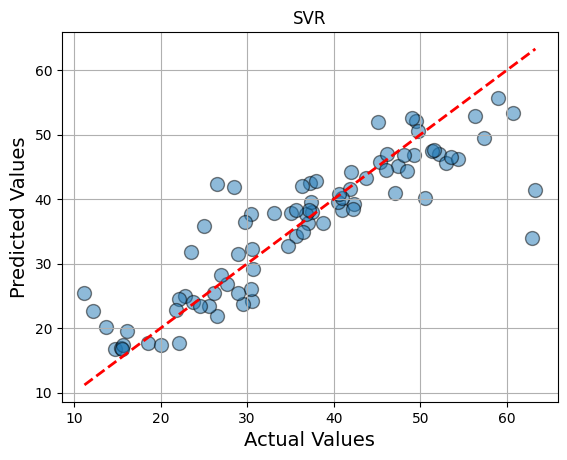



Model: RandomForestRegressor
R2 Score: 0.8156441903611069
MAE: 3.7401495314742315
MSE: 30.9274835258445




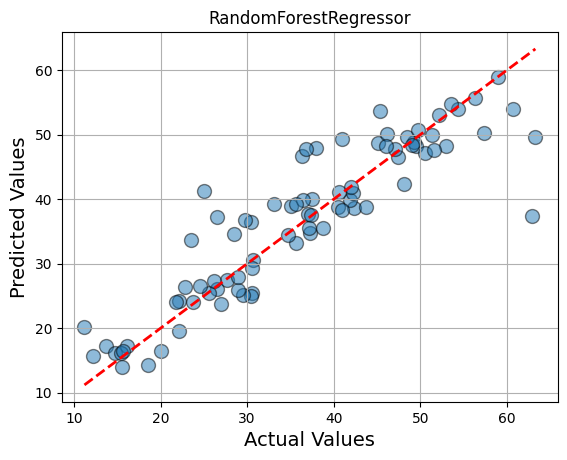



Model: GradientBoostingRegressor
R2 Score: 0.7758046965567978
MAE: 4.588029882344846
MSE: 37.61094682827145




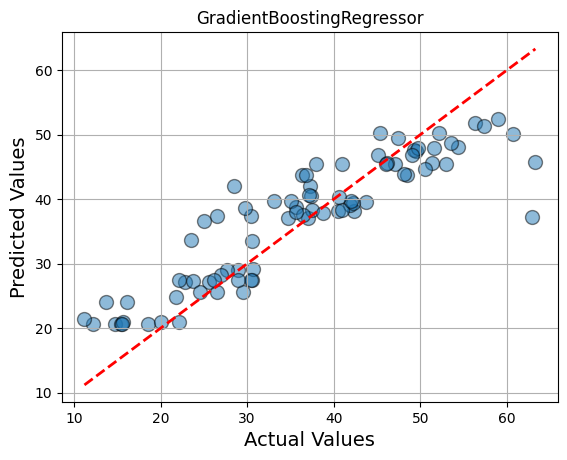

In [23]:
def evaluate_model(model):
    model.fit(X_train_fe_scaled, y_train_fe)
    y_pred_hp = model.predict(X_test_fe_scaled)
    r2 = r2_score(y_test_fe, y_pred_hp)
    mae = mean_absolute_error(y_test_fe, y_pred_hp)
    mse = mean_squared_error(y_test_fe, y_pred_hp)
    print("Model:", model.__class__.__name__)
    print("R2 Score:", r2)
    print("MAE:", mae)
    print("MSE:", mse)
    print("\n")

    plt.figure()
    plt.scatter(y_test_fe, y_pred_hp, alpha=0.5, edgecolors='k', s=100)
    plt.plot([min(y_test_fe), max(y_test_fe)], [min(y_test_fe), max(y_test_fe)], color='red', linestyle='--', linewidth=2)

    plt.title(model.__class__.__name__)
    plt.xlabel('Actual Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)

    plt.grid(True)
    plt.show()
    print("\n")

# Evaluate the best models obtained from Grid Search
for model in [svr_best, rfr_best, gbr_best]:
    evaluate_model(model)

# PCA

## Train Test Split

In [24]:
X_pca = df_fe.drop('Y house price of unit area', axis=1)
y_pca = df_fe['Y house price of unit area']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

## Feature Scaling

In [25]:
# Feature Scaling
scaler = StandardScaler()

# Fit scaler on training data and transform it
X_train_scaled_pca = scaler.fit_transform(X_train_pca)
X_test_scaled_pca = scaler.transform(X_test_pca)

## Implementation

In [26]:
pca = PCA(n_components=0.95)  # Choose the number of components based on your requirement

# Fit PCA on scaled training data and transform both training and testing data
X_train_scaled_pca = pca.fit_transform(X_train_scaled_pca)
X_test_scaled_pca = pca.transform(X_test_scaled_pca)

# Print number of components
print("Number of principal components:", pca.n_components_)

Number of principal components: 5


## PCA Hyperparameter Tuning

In [27]:
def perform_grid_search_pca(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='r2')
    grid_search.fit(X_train_scaled_pca, y_train_pca)
    print("Best Parameters for",model.__class__.__name__,":",grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    return grid_search.best_estimator_

In [28]:
# SVR
svr_pca = SVR()
svr_params_pca = {'kernel': ['linear', 'rbf'], 'C': [1, 10], 'gamma': ['scale', 'auto'], 'epsilon': [0.1, 0.2, 0.5, 1]}

# Random Forest Regressor
rfr_pca = RandomForestRegressor()
rfr_params_pca = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 10]}

# Gradient Boosting Regressor
gbr_pca = GradientBoostingRegressor()
gbr_params_pca = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}

In [29]:
# Grid Search and get the best model for each algorithm
svr_best_pca = perform_grid_search_pca(svr_pca, svr_params_pca)

rfr_best_pca = perform_grid_search_pca(rfr_pca, rfr_params_pca)

gbr_best_pca = perform_grid_search_pca(gbr_pca, gbr_params_pca)

Best Parameters for SVR : {'C': 10, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best R2 score: 0.6306212438765358
Best Parameters for RandomForestRegressor : {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best R2 score: 0.6372484452119226
Best Parameters for GradientBoostingRegressor : {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best R2 score: 0.5909426963687097


In [30]:
def evaluate_model_pca(model):
    model.fit(X_train_pca, y_train_pca)
    y_pred_pca = model.predict(X_test_pca)
    r2 = r2_score(y_test_pca, y_pred_pca)
    mae = mean_absolute_error(y_test_pca, y_pred_pca)
    mse = mean_squared_error(y_test_pca, y_pred_pca)
    print("Model:", model.__class__.__name__)
    print("R2 Score:", r2)
    print("MAE:", mae)
    print("MSE:", mse)
    print("\n")

# Evaluate the best models obtained from PCA
for model in [svr_best_pca, rfr_best_pca, gbr_best_pca]:
    evaluate_model_pca(model)

Model: SVR
R2 Score: 0.6057770721061273
MAE: 6.242536563750053
MSE: 66.1347376675009


Model: RandomForestRegressor
R2 Score: 0.8120791847261846
MAE: 3.760968583321719
MSE: 31.525547960372307


Model: GradientBoostingRegressor
R2 Score: 0.8122891770808097
MAE: 4.061722312958431
MSE: 31.490319696609188




Model: SVR
R2 Score: 0.6057770721061273
MAE: 6.242536563750054
MSE: 66.1347376675009


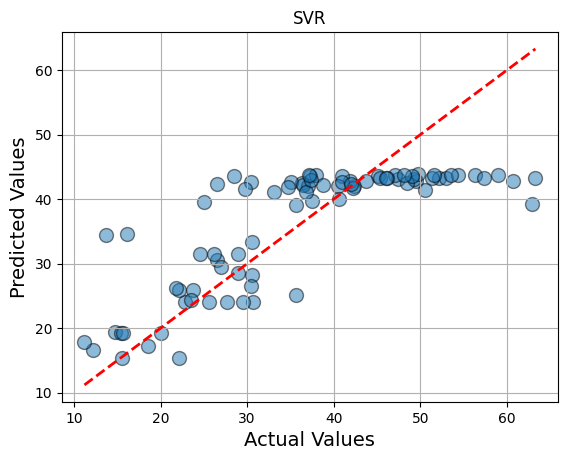



Model: RandomForestRegressor
R2 Score: 0.8135956252776824
MAE: 3.779065530705115
MSE: 31.271150280872888


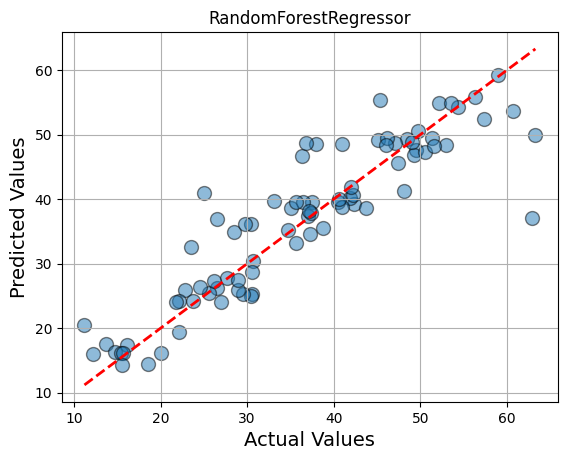



Model: GradientBoostingRegressor
R2 Score: 0.8109751741941709
MAE: 4.070841109231965
MSE: 31.710756485170595


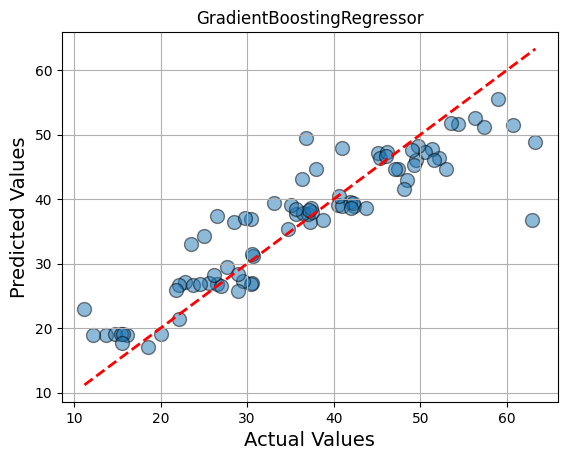

In [44]:
def evaluate_model_pca(model):
    model.fit(X_train_pca, y_train_pca)
    y_pred_pca = model.predict(X_test_pca)
    r2 = r2_score(y_test_pca, y_pred_pca)
    mae = mean_absolute_error(y_test_pca, y_pred_pca)
    mse = mean_squared_error(y_test_pca, y_pred_pca)
    print("Model:", model.__class__.__name__)
    print("R2 Score:", r2)
    print("MAE:", mae)
    print("MSE:", mse)
    plt.figure()
    plt.scatter(y_test_pca, y_pred_pca, alpha=0.5, edgecolors='k', s=100)
    plt.plot([min(y_test_pca), max(y_test_pca)], [min(y_test_pca), max(y_test_pca)], color='red', linestyle='--', linewidth=2)

    plt.title(model.__class__.__name__)
    plt.xlabel('Actual Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)

    plt.grid(True)
    plt.show()
    print("\n")

# Evaluate the best models obtained from PCA
for model in [svr_best_pca, rfr_best_pca, gbr_best_pca]:
    evaluate_model_pca(model)